# BigMart Sales Prediction

In [76]:
#imported all the packages that will be used for our model.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Loading

In [77]:
#loading the data 
test=pd.read_csv("Dataset/Test.csv")
train=pd.read_csv("Dataset/Train.csv")

In [78]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [18]:
data.columns
#it retuen the column labels of the dataframe 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

## Checking Numerical and categorical data

In [25]:
# Check datatypes
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Item_Type_Combined            object
dtype: object

# Univariate Analysis

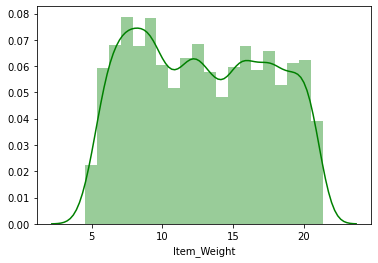

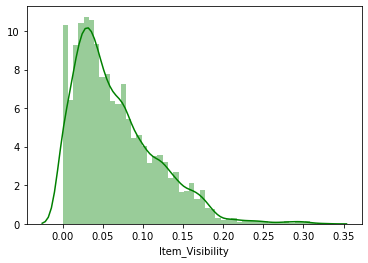

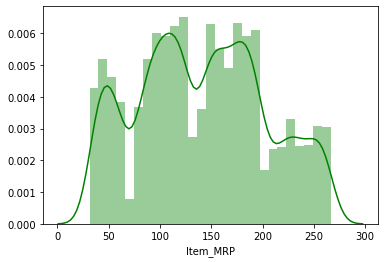

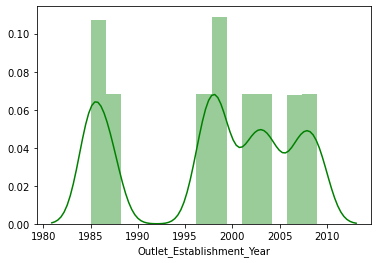

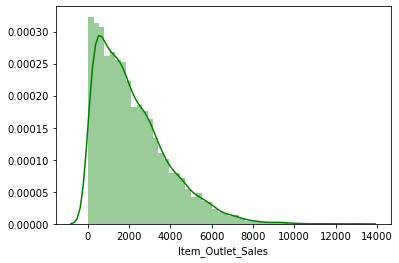

In [8]:
#I have plotted different charts to describe the data of various columns
for i in train.describe().columns:
    sns.distplot(train[i].dropna(),color='green')
    plt.show()

## 1. Distribution of Item_Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

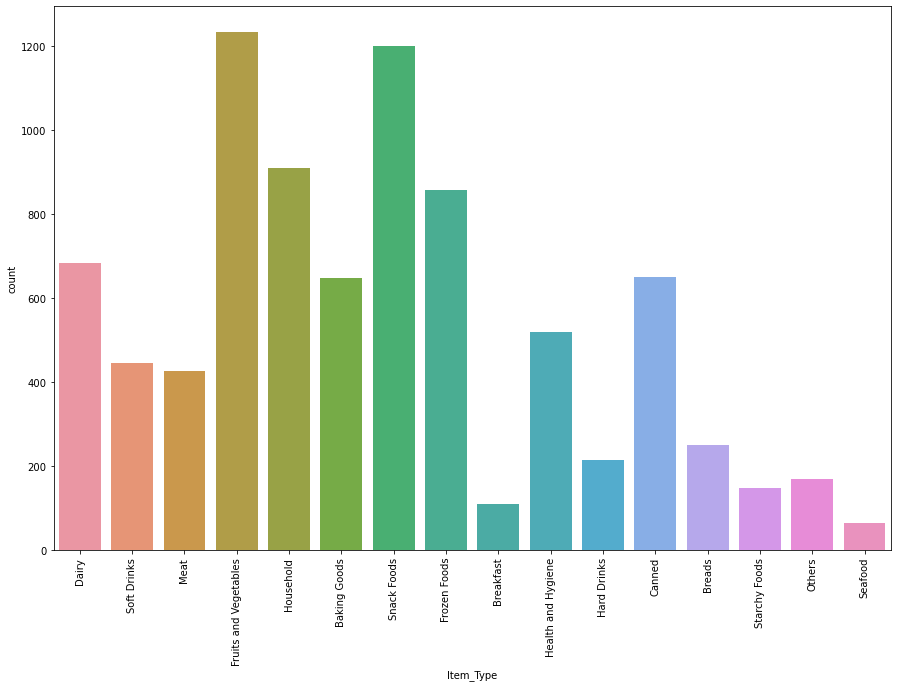

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

### It shows us the various categories of Item_Type which we need to handle.

In [20]:
# Item Type
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

#### We see that the Item_Type variable has 16 categories. So its a good idea to combine them. One way could be to manually assign a new category to each. But If we look at the Item_Identifier, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column.

In [54]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

## 2.Distribution of Outlet_Size

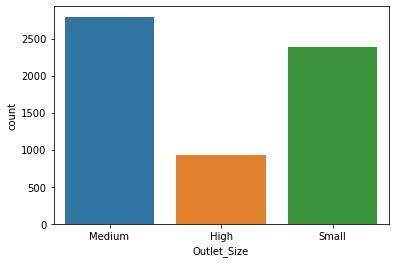

In [14]:
sns.countplot(train.Outlet_Size)

#### From here we can analyse that most of the people goes to medium-sized store.

## 3.Distribution of Outlet_Location_Type

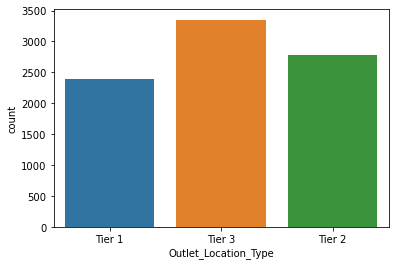

In [17]:
sns.countplot(train.Outlet_Location_Type)

#### Bigmart appears to be more present in “Small” to “Medium” size cities than in more densily populated locations.

## 4.Distribution of Outlet_Type

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

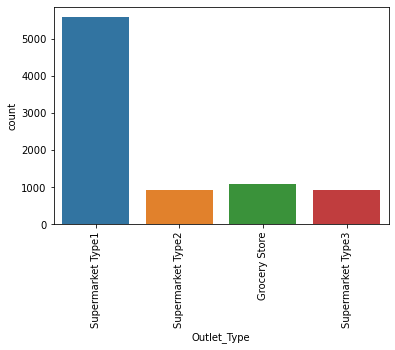

In [18]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

#### It looks like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low expression in this distribution.

## 5.Distribution of Item_Fat_Content

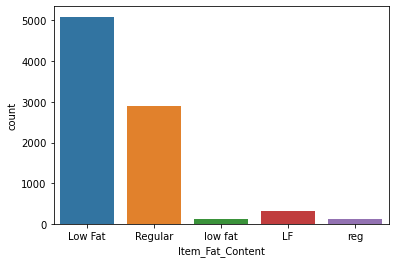

In [79]:
sns.countplot(train.Item_Fat_Content)

In [11]:
# Item_Fat_Content
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

#### From here we can see low fat and regular is miscoded as 'low fat','LF'. So we need to convert this data .

In [45]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [46]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

# Bivariate Analysis

## Analysis of Item_Weight and Item_Outlet_Sales

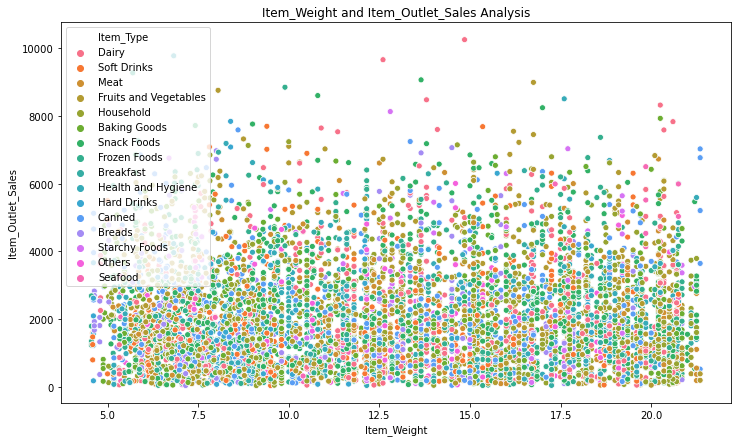

In [23]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue='Item_Type',data=train)

##  Item_Visibility and Item_Outlet_Sales analysis

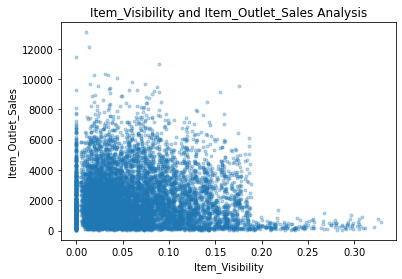

In [35]:
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

## Item_Visibility and MRP analysis

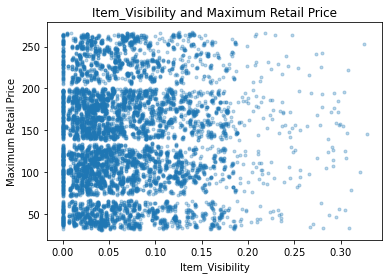

In [34]:
plt.xlabel("Item_Visibility")
plt.ylabel("Maximum Retail Price")
plt.title("Item_Visibility and Maximum Retail Price")
plt.plot(train.Item_Visibility,train.Item_MRP,'.',alpha=0.3)

## Impact of Item_Fat_Content on Item_Outlet_Sales

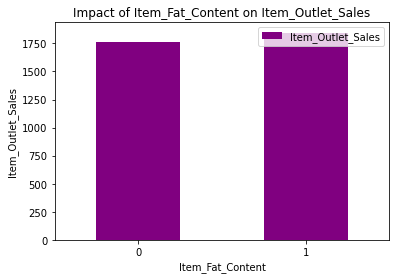

In [16]:
Item_Fat_Content_pivot = data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='purple')
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

## Impact of Outlet_Identifier on Item_Outlet_Sales

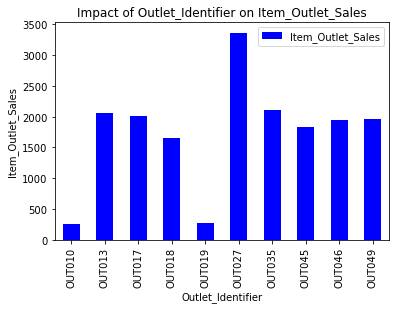

In [44]:
Outlet_Identifier_pivot =train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue')
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

#### We see that the groceries (“OUT010”, “OUT019”) have the lowest sales results which is expected followed by the Supermarket Type 2 (“OUT018”).  The best results belong to “Out027” which is a “Medium” size Supermarket Type 3.

## Impact of Outlet_Type on Item_Outlet_Sales

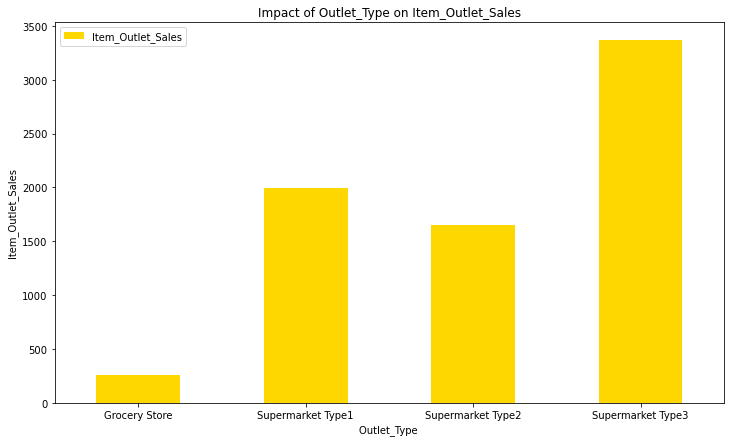

In [52]:
Outlet_Type_pivot = train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='gold',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### From this analysis possibly we can create a new feature that shows the sales ratio according to the store size.

## Imputing Missing Values

In [30]:
# Checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Type_Combined              0
dtype: int64

#### We can see that Item_Weight,Outlet_Size and Item_Outlet_Sales have missing values. But Item_Outlet_Sales is our target variable , so we just need to focus on Item_Weight and Outlet_Size.

In [48]:
#There were two columns with missing values Item_Weight and Outlet_Size. We can fill it with the average weight of particular item.
# data.pivot_table() allows us to create a table with all the identifiers and their respective weight.
# With its help,for those missing the weight we can retrieve from this table the mean() weight of all products with the same Item_Identifier.
item_avg_weight=data.pivot_table(values='Item_Weight',index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [49]:
def new_weight(cols):
    Weight=cols[0]
    Identifier=cols[1]
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index==Identifier]
    else:
        return Weight
print("Original missing values:",sum(data['Item_Weight'].isnull()))
data['Item_Weight']=data[['Item_Weight','Item_Identifier']].apply(new_weight,axis=1).astype(float)
print("Final missing values:",sum(data['Item_Weight'].isnull()))

Original missing values: 2439
Final missing values: 0


#### Now there is no missing value in Item_Weight

In [50]:
#Now we will impute Outlet_Size with the mode of Outlet_Size for the particular type of outlet.
from scipy.stats import mode
outlet_size_mode=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))
print("Mode for each outlet type")
print(outlet_size_mode)

Mode for each outlet type
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [51]:
miss_val=data['Outlet_Size'].isnull()
print("Original missing values:",sum(data['Outlet_Size'].isnull()))
data.loc[miss_val,'Outlet_Size']=data.loc[miss_val,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print("Final missing values:",sum(data['Item_Weight'].isnull())) 

Original missing values: 4016
Final missing values: 0


In [52]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

#### My data is almost clean now.

In [41]:
#We see that Item_Visibility have some 0 values which is not practically possible so we will fill it with mean Visibility of that product
visibility_avg=data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [47]:
def new_visibility(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_avg['Item_Visibility'][visibility_avg.index == item]
    else:
        return visibility
print ("Number of zeroes initially:",sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(new_visibility,axis=1).astype(float)
print ("Number of zeroes after modification:",sum(data['Item_Visibility'] == 0))

Number of zeroes initially: 879
Number of zeroes after modification: 0


 #### We have already treated Item_Fat_Content but we see there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [56]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Handling Categorical Variables with numerically coded values

### Now We have to convert all the categorical data into numerical values as some machine learning models only accept numeric values.

In [57]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [58]:
#get_dummies is used to generate dummy variables from these numerical categorical variables. Each will have binary numbers—
#0 (if the category is not present) and 1(if category is present).
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [63]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,train,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,NaN,test,0,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,NaN,test,0,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,test,0,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.088380,Canned,214.6218,OUT017,2007,NaN,test,0,...,0,0,1,0,0,0,0,0,0,0


#### Here we have 3 categories in Item_Fat_Content which is now divided as: (  Item_Fat_Content_0 for 'Low Fat' ,Item_Fat_Content_1 for 'Regular' and Item_Fat_Content_2 for 'Non-edible' ). Similarly 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type_Combined' and  'Outlet_Identifier' are divided into different categories converting our whole data attributes into numeric values.

In [66]:
# Convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so 
#that they can be re-used for multiple sessions.
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#Export files as modified versions:
train.to_csv("Dataset/train_modified.csv",index=False)
test.to_csv("Dataset/test_modified.csv",index=False)

c:\users\lenovo notebook\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Correlation Matrix

In [69]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
Item_Weight,1.000000,-0.022028,0.035751,0.013261,-0.012806,0.057474,-0.033737,0.001463,0.000178,-0.001515,...,-0.004001,-0.000395,-0.000848,0.000771,-0.000151,0.000416,0.000834,0.000279,0.001500,0.000724
Item_Visibility,-0.022028,1.000000,-0.007550,-0.128453,0.015127,-0.081216,0.050767,0.057895,-0.074910,0.018700,...,0.188096,-0.039371,-0.035989,-0.038217,0.210861,-0.041874,-0.038526,-0.038262,-0.039479,-0.040164
Item_MRP,0.035751,-0.007550,1.000000,0.567574,-0.003337,0.009151,-0.004019,-0.000658,-0.000192,0.000790,...,0.000658,0.000697,-0.000034,-0.000023,-0.001046,0.000042,0.000576,-0.000832,-0.001032,0.000892
Item_Outlet_Sales,0.013261,-0.128453,0.567574,1.000000,-0.009438,-0.010861,0.018719,-0.111287,0.058261,0.046376,...,-0.284883,0.024170,0.032610,-0.038059,-0.277250,0.311192,0.052823,0.002274,0.019803,0.034264
Item_Fat_Content_0,-0.012806,0.015127,-0.003337,-0.009438,1.000000,-0.443508,-0.678900,0.000303,0.000459,-0.000719,...,-0.002996,0.000647,0.000910,0.000741,-0.000376,-0.000143,0.000363,-0.000582,0.000363,0.000363
Item_Fat_Content_1,0.057474,-0.081216,0.009151,-0.010861,-0.443508,1.000000,-0.356971,0.000951,-0.000238,-0.000646,...,0.001516,-0.000965,-0.000453,-0.001357,0.001186,0.000110,-0.000639,0.000733,0.000515,-0.000062
Item_Fat_Content_2,-0.033737,0.050767,-0.004019,0.018719,-0.678900,-0.356971,1.000000,-0.001095,-0.000283,0.001279,...,0.001880,0.000116,-0.000578,0.000340,-0.000580,0.000059,0.000144,0.000006,-0.000800,-0.000328
Outlet_Location_Type_0,0.001463,0.057895,-0.000658,-0.111287,0.000303,0.000951,-0.001095,1.000000,-0.434650,-0.502095,...,-0.164672,-0.218602,-0.217811,-0.218049,0.411901,-0.219076,-0.218365,-0.218207,0.560946,0.560946
Outlet_Location_Type_1,0.000178,-0.074910,-0.000192,0.058261,0.000459,-0.000238,-0.000283,-0.434650,1.000000,-0.560614,...,-0.183864,-0.244080,0.501118,-0.243462,-0.179033,-0.244609,0.502393,0.502029,-0.243815,-0.243815
Outlet_Location_Type_2,-0.001515,0.018700,0.000790,0.046376,-0.000719,-0.000646,0.001279,-0.502095,-0.560614,1.000000,...,0.327969,0.435380,-0.280934,0.434277,-0.206814,0.436324,-0.281648,-0.281444,-0.281648,-0.281648


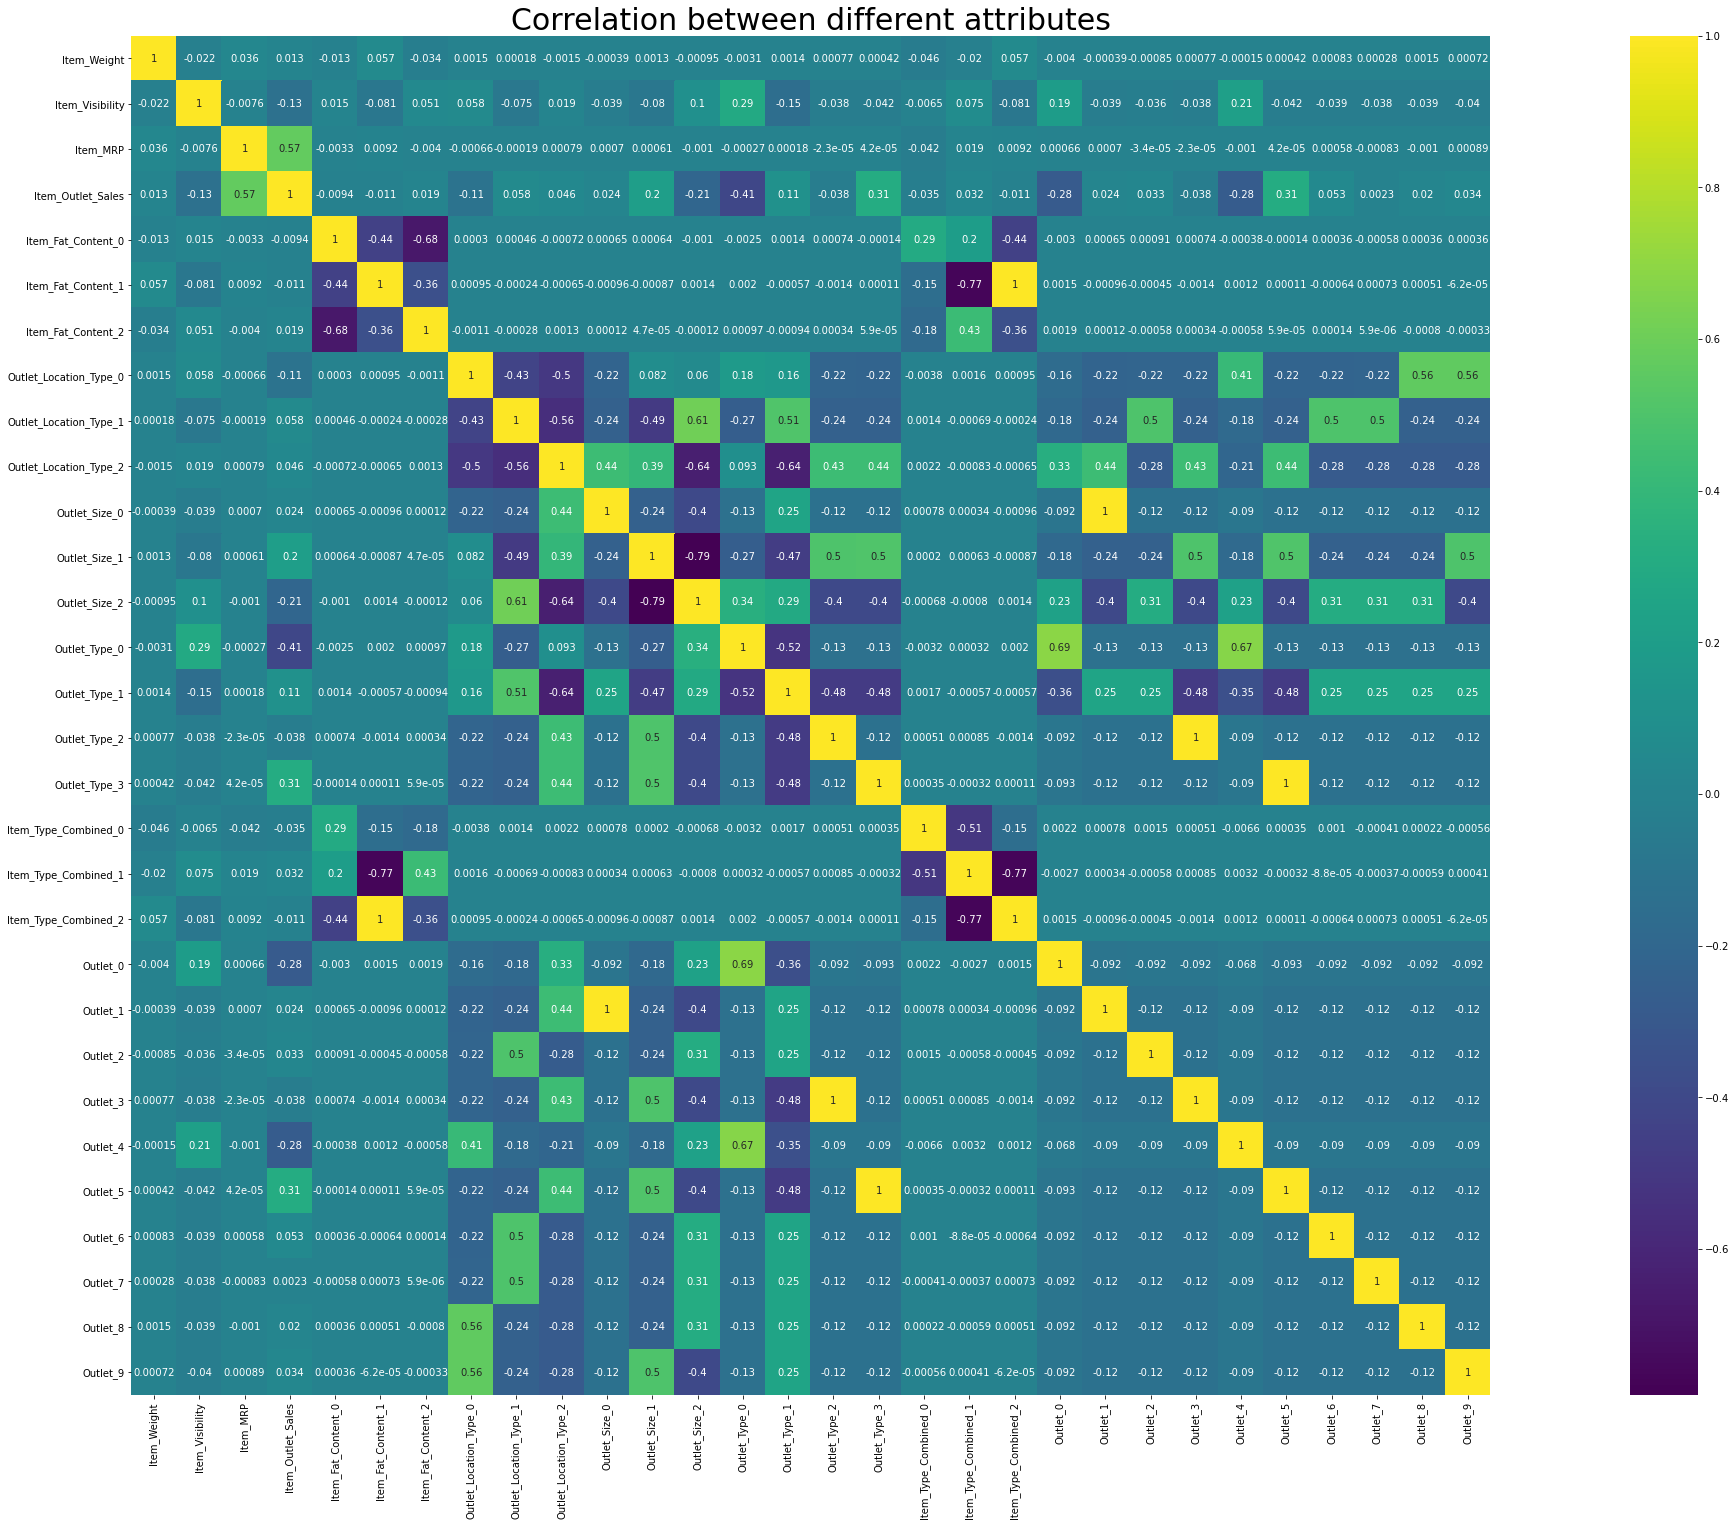

In [75]:
plt.figure(figsize=(50,25))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Correlation between different attributes",fontdict={'fontsize':30})
plt.show()

#### From this graph we can see we have a strongest correlation between:
- Item_Fat_Content_1 and Item_Type_Combined_2 
- Outlet_Size_0 and Outlet_1
- Outlet_Type_3 and Outlet_5
- Outlet_Type_2 and Outlet_3